**Finding the distance between two points**

In [86]:
import numpy as np

In [87]:
def distance(p1, p2):
    """
    Take in 2 points as np array
    Finds the distance between the 2 points
    """
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
print(distance(p1, p2))

4.24264068712


**Majority Vote**

In [88]:
import scipy.stats as ss

def majority_vote(votes):
    """
    Return the most common element in votes array.
    """   
    mode, count = ss.mstats.mode(votes)
    return mode[0]
    

votes = [1, 2, 3, 1, 2, 3, 3, 3]
print(majority_vote(votes))

3.0


**Finding Nearest Neighbors**

Populating the interactive namespace from numpy and matplotlib


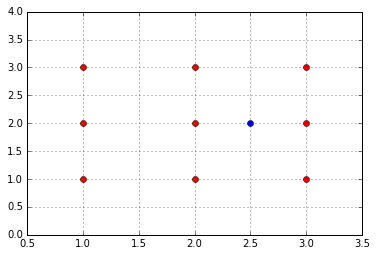

In [89]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])

import matplotlib.pyplot as plt
%pylab inline

plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0, 4])
plt.grid()

In [90]:
def find_nearest_neighbors(points, p, k=5):
    """Find the k nearest neighbors of p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = (distance(points[i], p))
    return np.argsort(distances)[:k]


print(find_nearest_neighbors(points, p))

[4 7 3 5 6]


In [91]:
def knn_predict(points, p, outcomes, k=5):
    # find k nearest neighbors
    ind = find_nearest_neighbors(points, p, k)
    # predict the class of p based on majority vote
    return majority_vote(outcomes[ind])

In [92]:
outcomes = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
knn_predict(points, np.array([2.5, 2.7]), outcomes, k=2)

1.0

In [93]:
outcomes = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
knn_predict(points, np.array([1.0, 2.7]), outcomes, k=2)

0.0

**Generating Synthetic Data**

In [94]:
def generate_synth_data(n):
    """Create 2 sets of points from bivariate normal distributions."""
    points = np.concatenate((ss.norm(0, 1).rvs((n,2)), ss.norm(1, 1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
points, outcomes = generate_synth_data(n)

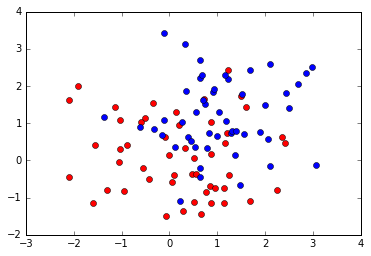

In [95]:
plt.figure()
plt.plot(points[:n, 0], points[:n, 1], 'ro')
plt.plot(points[n:, 0], points[n:, 1], 'bo')
plt.savefig("bivardata.pdf")

**Making a Prediction Grid**

In [96]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid"""
    x_min, x_max, y_min, y_max = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(predictors, p, outcomes, k)
    
    return xx, yy, prediction_grid

In [97]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

Populating the interactive namespace from numpy and matplotlib


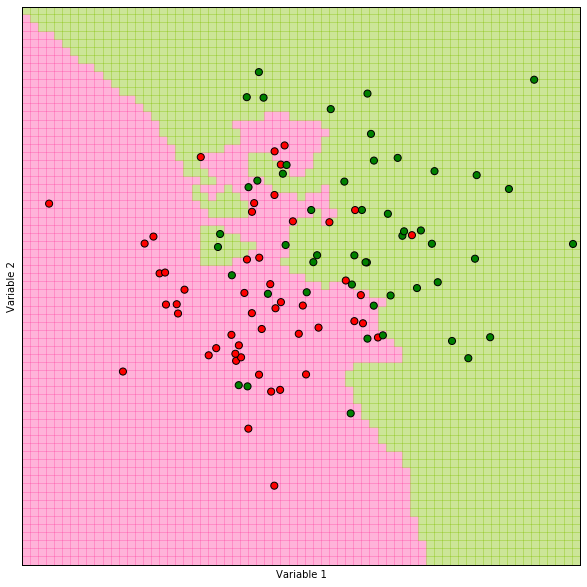

In [98]:
# plot prediction grid
k = 5; filename = "knn_synth_5.pdf"; limits = (-3, 4, -3, 4); h = 0.1
predictors, outcomes = generate_synth_data(n)

xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)

plot_prediction_grid(xx, yy, prediction_grid, filename)

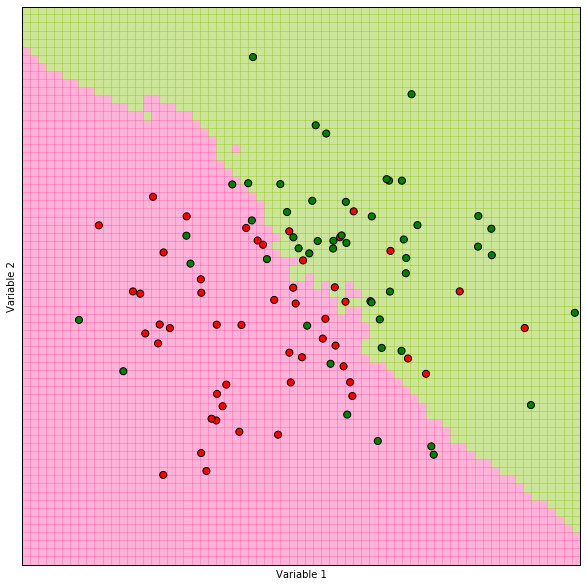

In [101]:
k = 50; filename = "knn_synth_50.pdf"; limits = (-3, 4, -3, 4); h = 0.1
predictors, outcomes = generate_synth_data(n)

xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)

plot_prediction_grid(xx, yy, prediction_grid, filename)

**Applying the kNN Method**

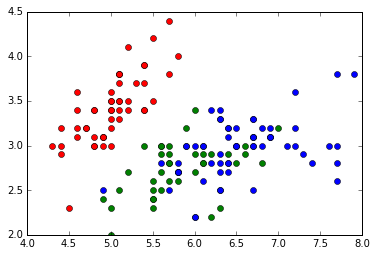

In [105]:
from sklearn import datasets
iris = datasets.load_iris()

predictors = iris.data[:, :2]
outcomes = iris.target

plt.plot(predictors[outcomes==0][:, 0], predictors[outcomes==0][:, 1], 'ro')
plt.plot(predictors[outcomes==1][:, 0], predictors[outcomes==1][:, 1], 'go')
plt.plot(predictors[outcomes==2][:, 0], predictors[outcomes==2][:, 1], 'bo')

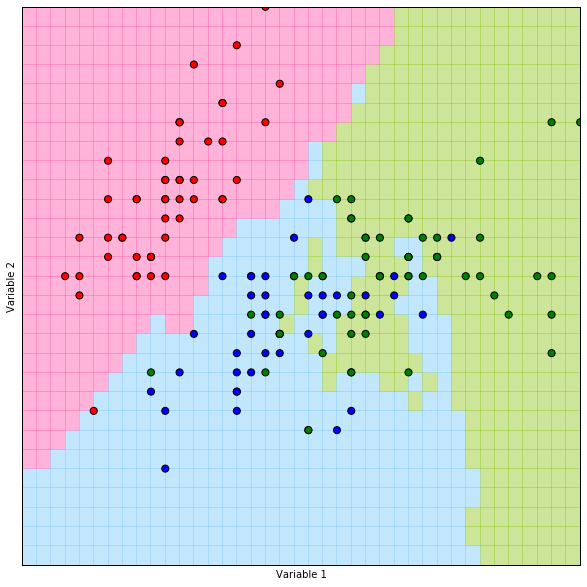

In [106]:
k = 5; filename = "iris_grid.pdf"; limits = (4,8,1.5,4.5); h = 0.1
xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)
my_predictions = np.array([knn_predict(predictors, p, outcomes) for p in predictors])

In [112]:
# compare my predictions and Scikit predicitions
print("The predictions agree {} %".format(100 * np.mean([sk_predictions == my_predictions])))

The predictions agree 96.0 %


In [114]:
# compare my predictions with actual outcomes
print("The predictions agree {:.3f} %".format(100 * np.mean([outcomes == my_predictions])))

The predictions agree 84.6667 %


In [115]:
# compare scikit predictions with actual outcomes
print("The predictions agree {:.3f} %".format(100 * np.mean([outcomes == sk_predictions])))

The predictions agree 83.333 %
